In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("./data_validation.csv"):
    data_frame = pd.read_csv("../../dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
    )
    
    df_train.to_csv("./data_train.csv", index=False)
    df_validation.to_csv("./data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 1816 to 682
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
1816,40.0,13.7,4.49,8.6,302,30.5,34.3,89.1,41,M,out
2548,27.5,8.9,3.41,11.2,292,26.1,32.4,80.6,53,F,in
3235,35.6,11.5,4.07,9.4,377,28.3,32.3,87.5,63,M,out
1710,37.1,12.9,4.07,9.6,162,31.7,34.8,91.2,39,F,in
2094,36.1,12.7,4.22,9.6,309,30.1,35.2,85.5,46,M,in


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,206
HAEMOGLOBINS,92
ERYTHROCYTE,241
LEUCOCYTE,155
THROMBOCYTE,244
MCH,113
MCHC,68
MCV,208
AGE,85
SEX,2


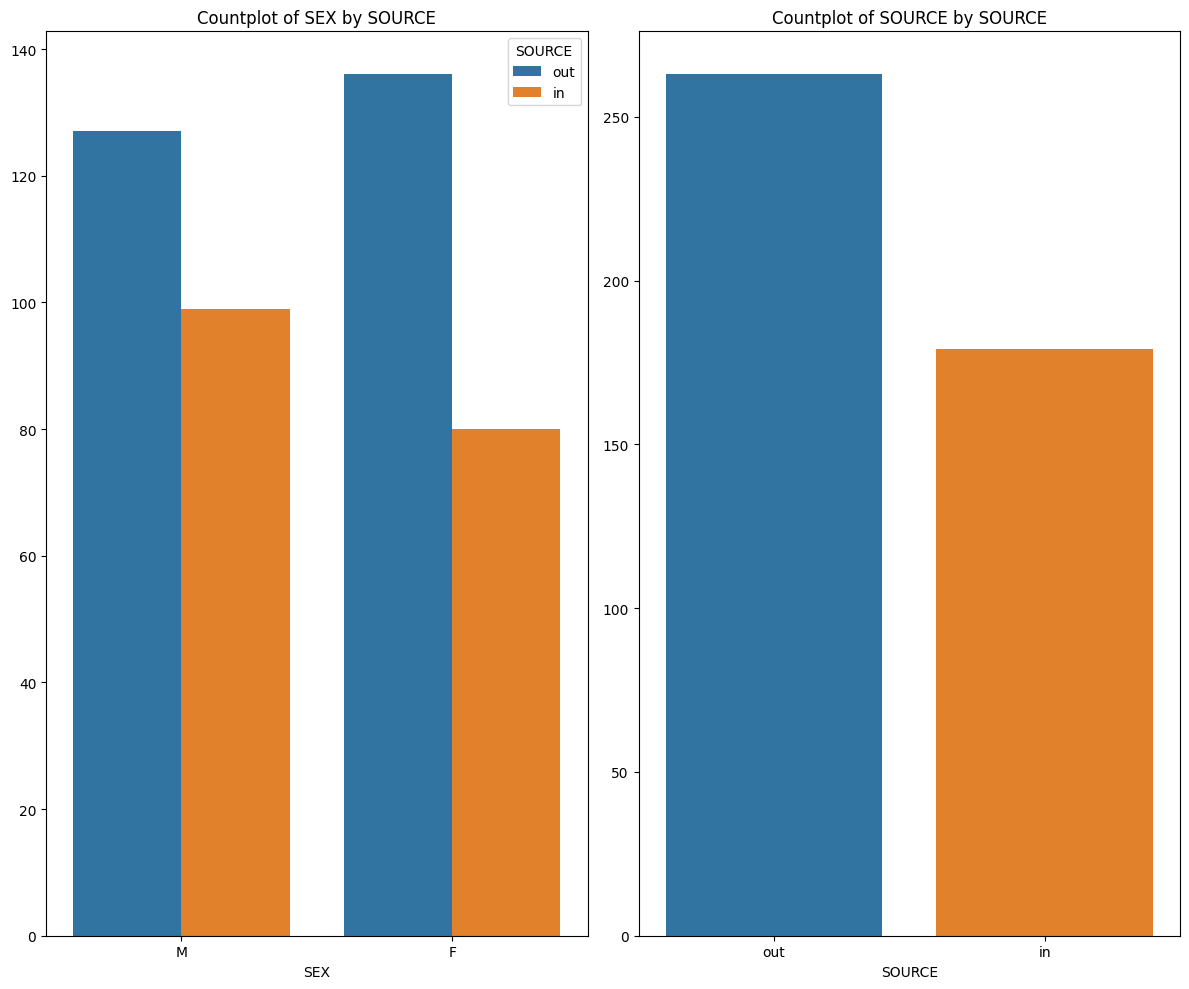

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,37.962443,6.176166,14.50,34.200,38.550,42.3750,54.00
HAEMOGLOBINS,442.0,12.656787,2.136384,5.00,11.325,12.850,14.2000,17.90
ERYTHROCYTE,442.0,4.524005,0.839235,1.72,3.990,4.565,5.0975,7.54
LEUCOCYTE,442.0,8.597059,4.976139,1.40,5.400,7.500,10.4000,41.10
THROMBOCYTE,442.0,253.617647,114.426108,11.00,186.000,251.000,317.0000,895.00
MCH,442.0,28.218552,2.840806,15.50,27.100,28.800,29.9000,37.80
MCHC,442.0,33.326923,1.237188,27.10,32.625,33.400,34.0000,38.40
MCV,442.0,84.568552,7.053616,57.30,81.700,85.350,89.0000,104.50
AGE,442.0,45.079186,21.745395,1.00,29.000,45.000,62.0000,88.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

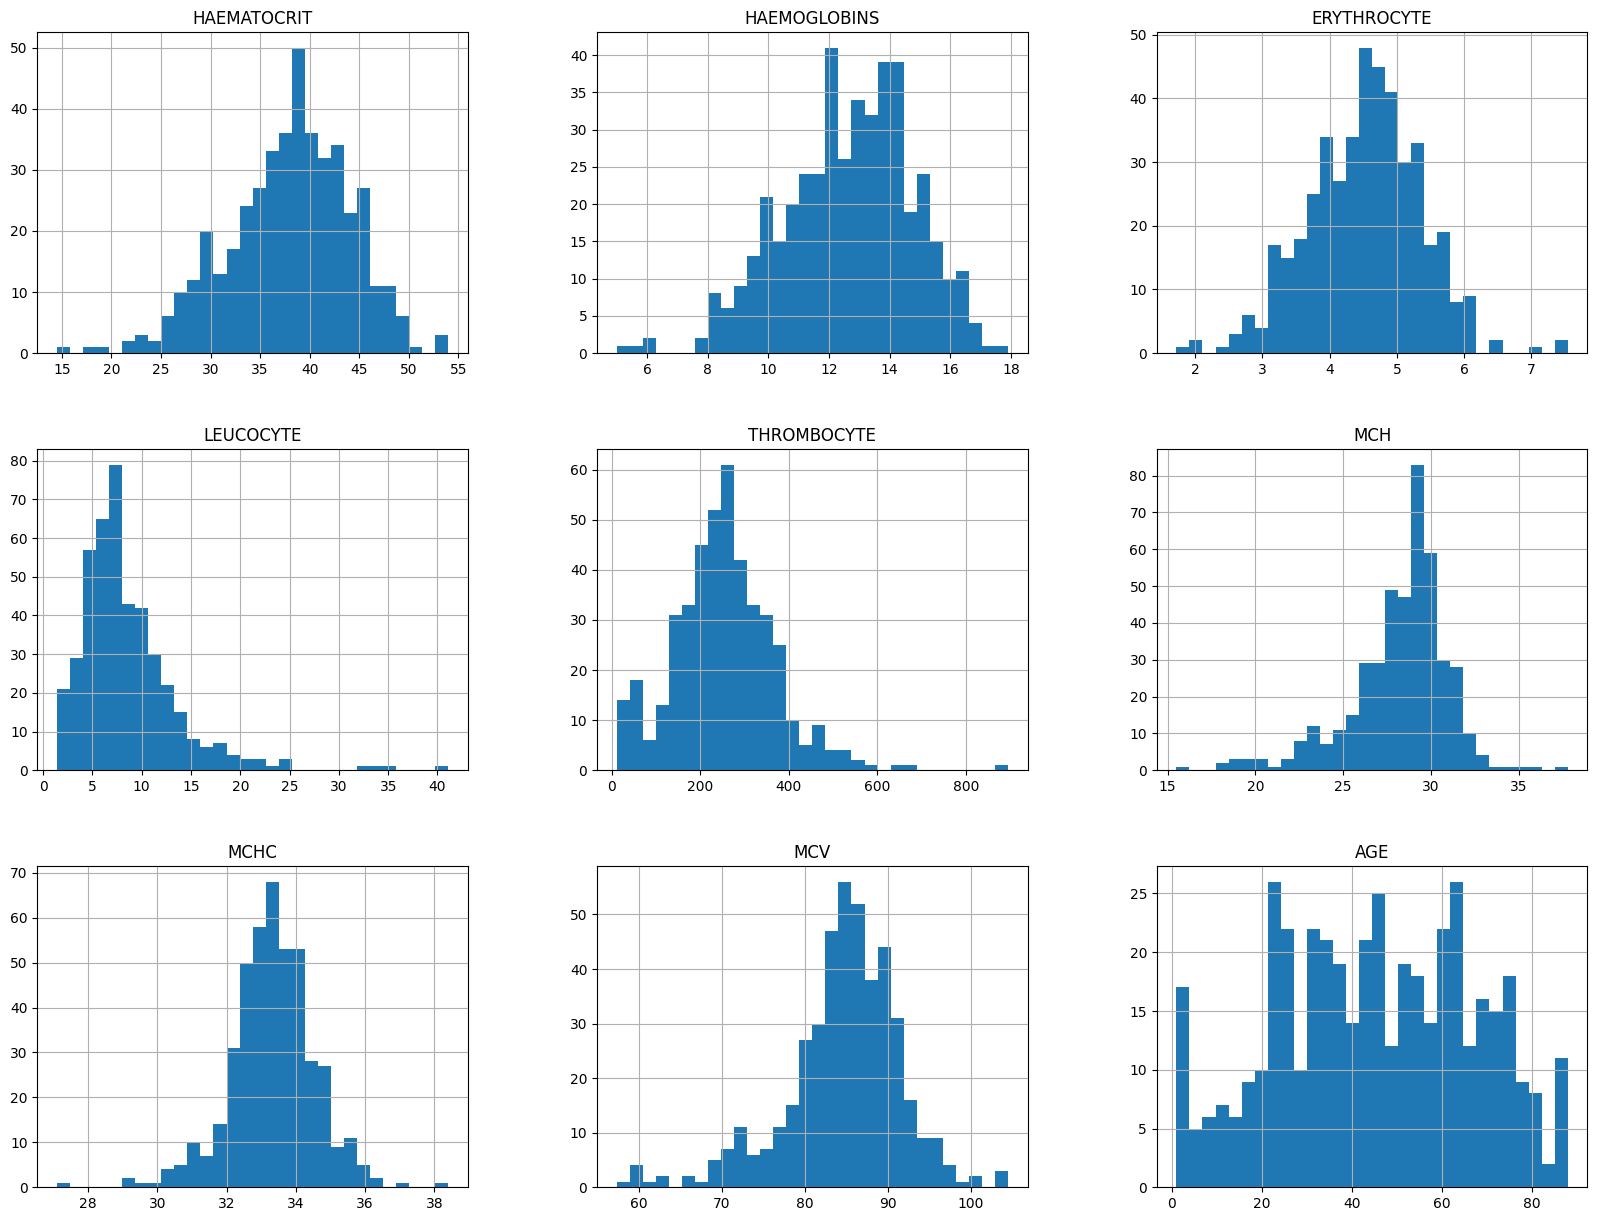

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

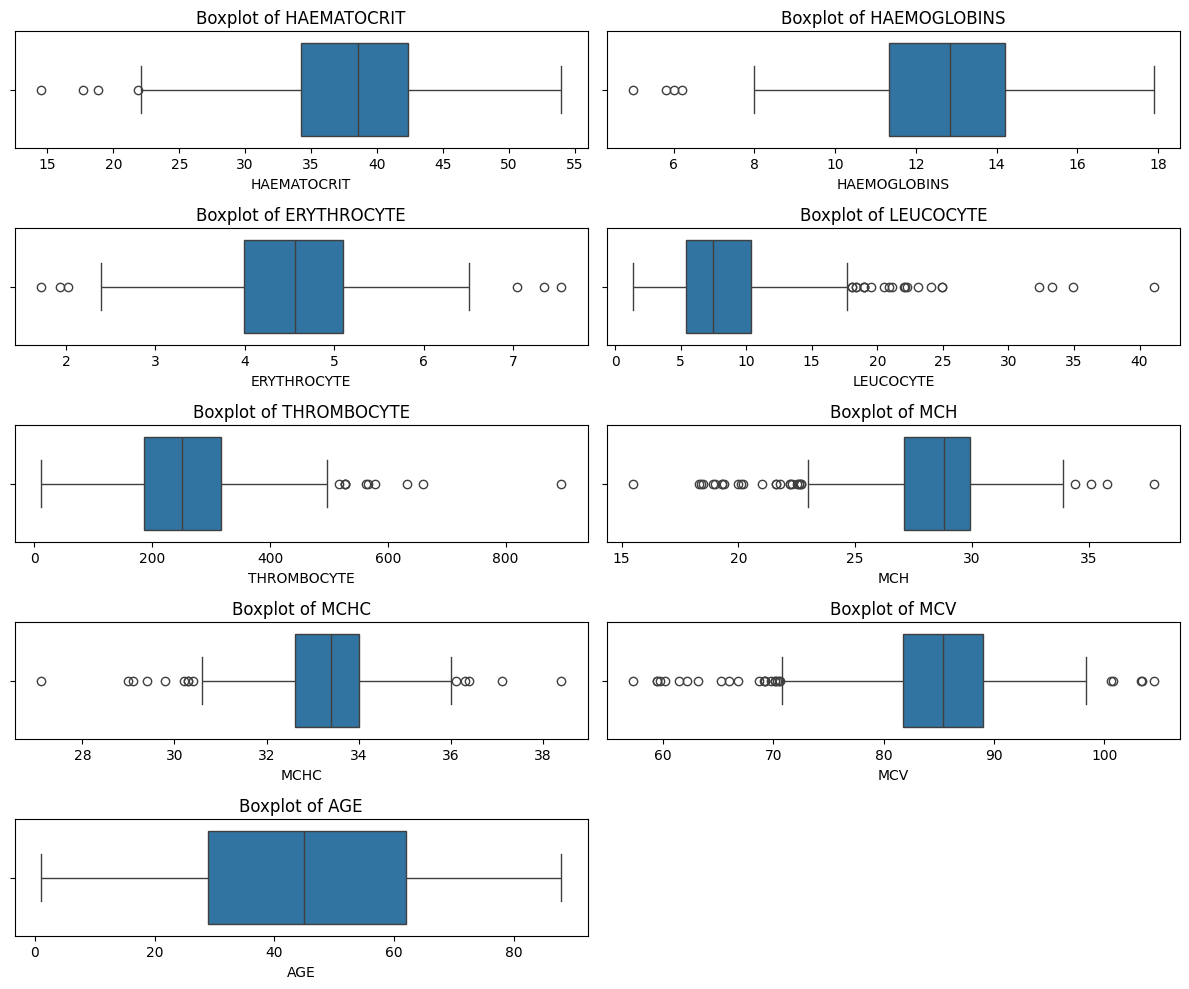

In [8]:
create_boxplots_from_df(df_numerical)

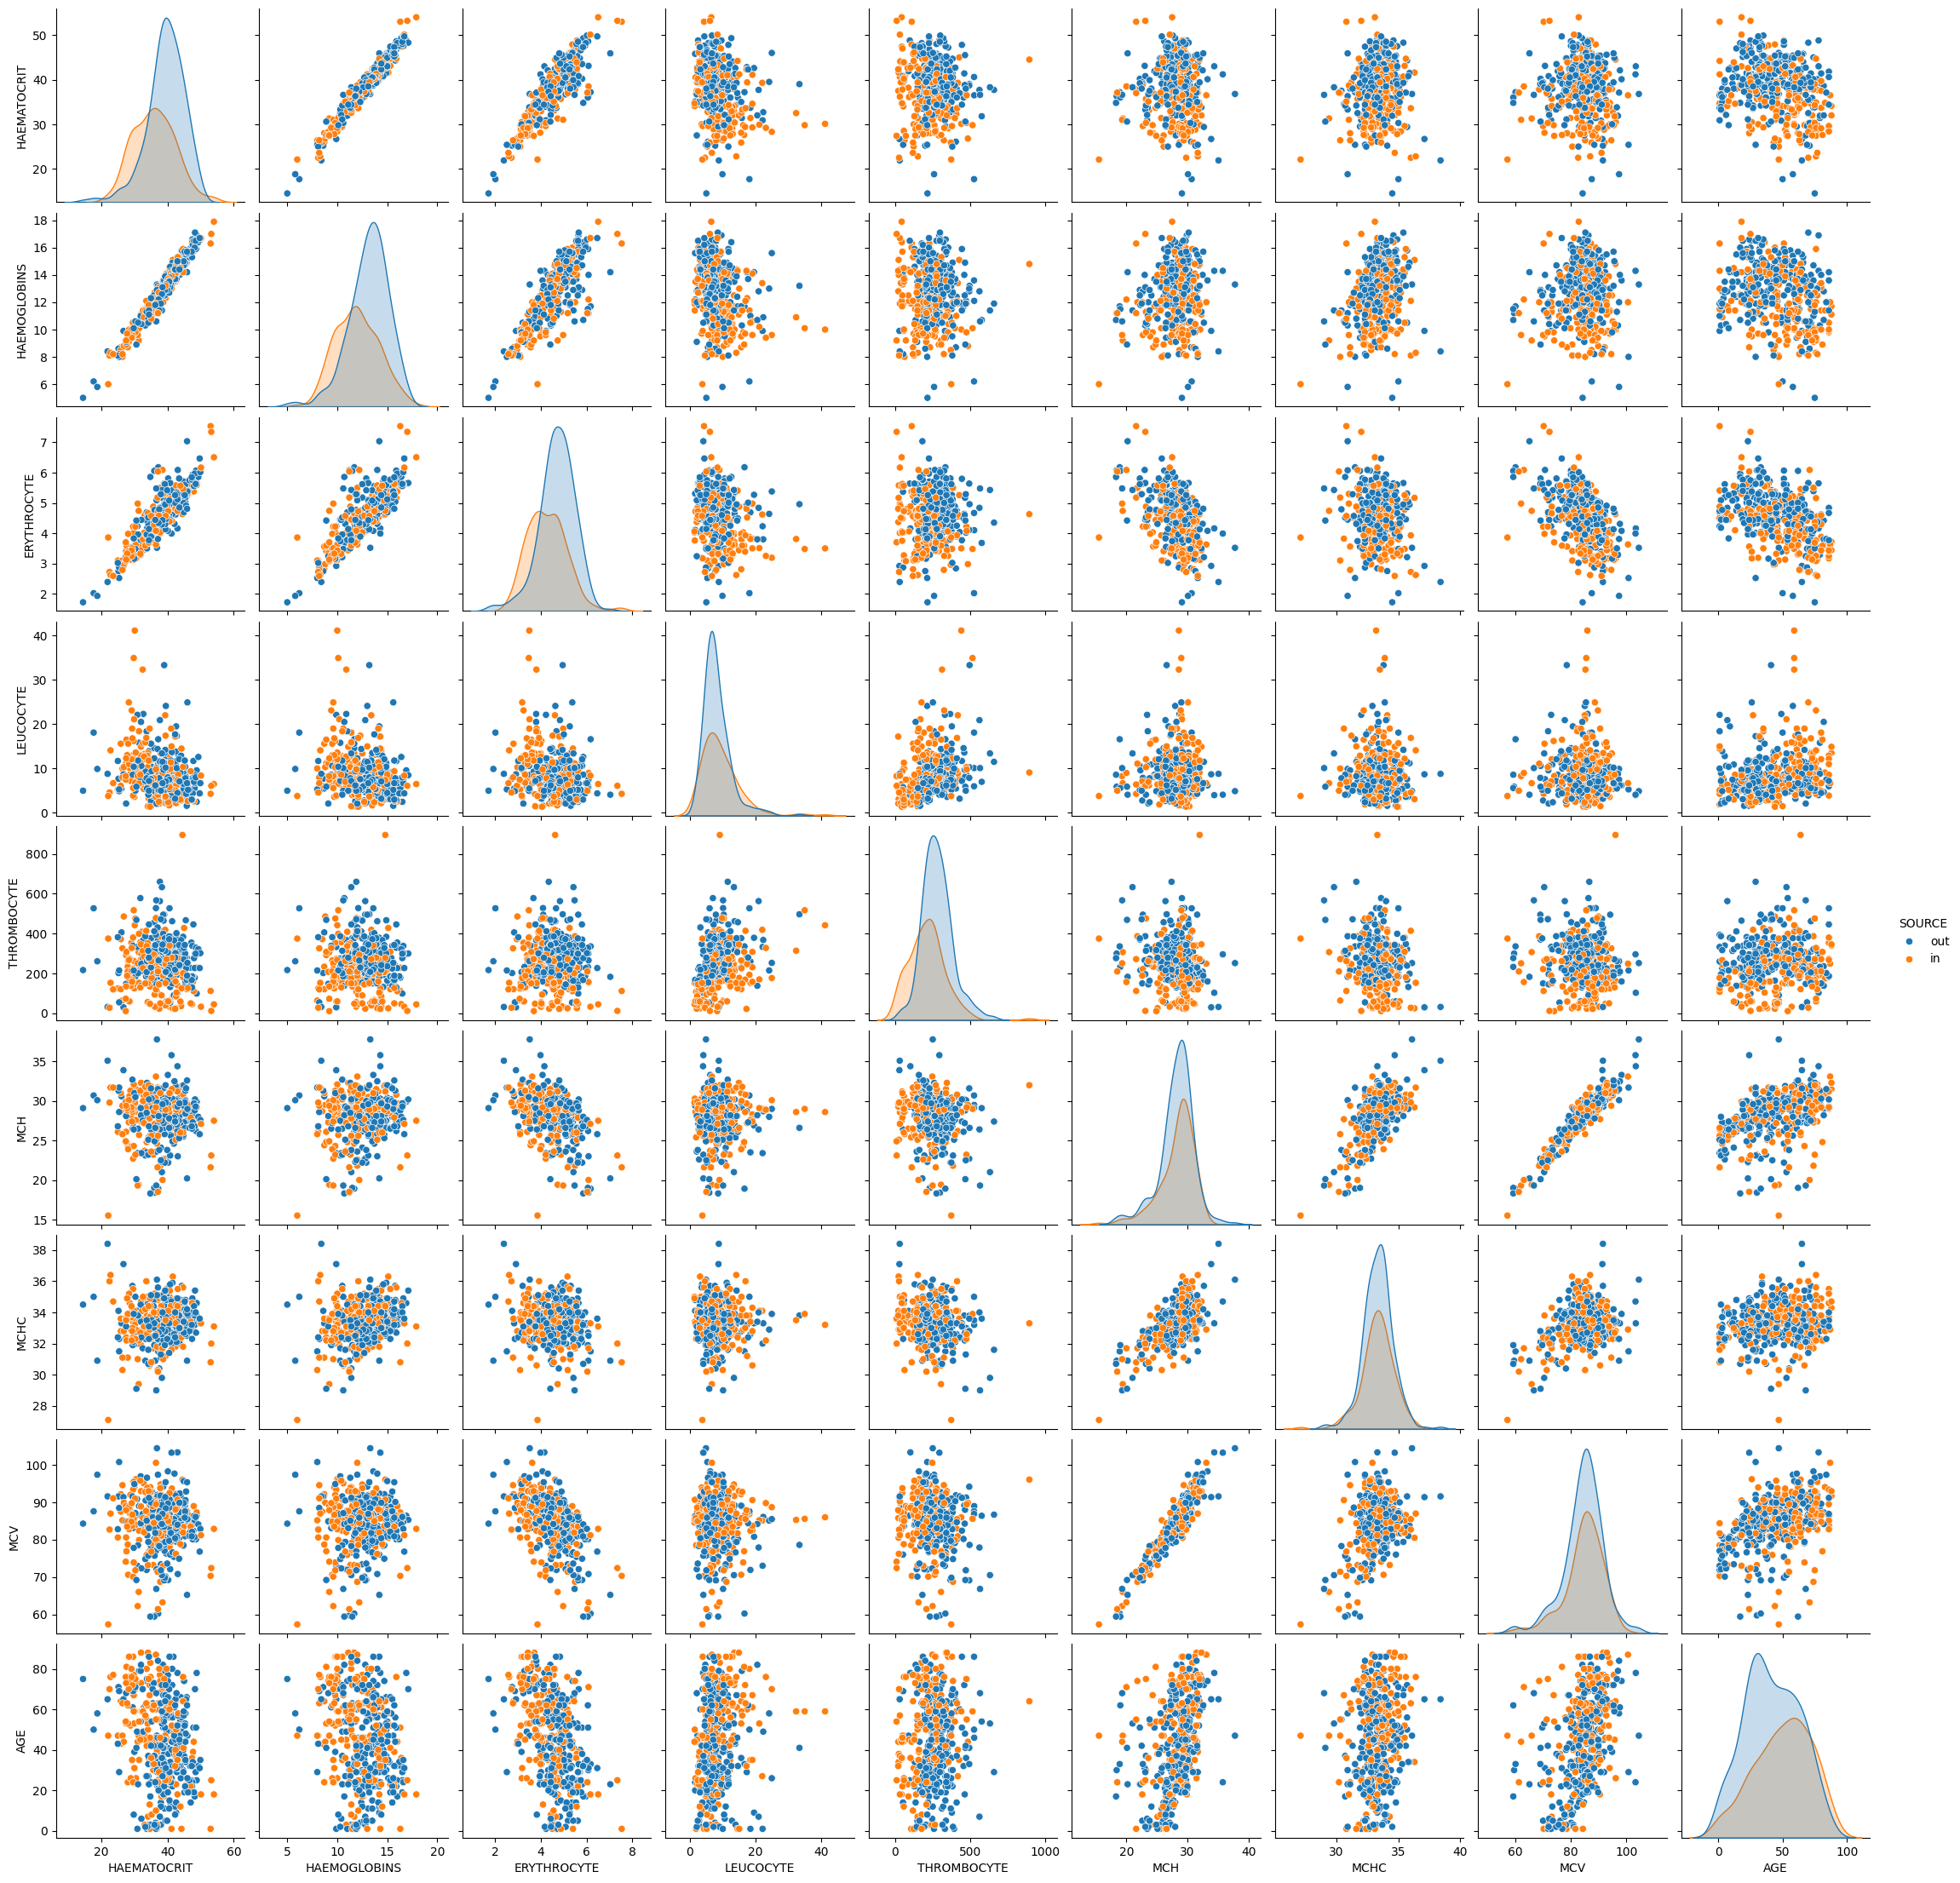

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.978627,0.875884,-0.256692,-0.011723,-0.007762,0.061271,-0.030300,-0.288090
HAEMOGLOBINS,0.978627,1.000000,0.815632,-0.248318,-0.050335,0.127887,0.260571,0.049034,-0.251721
ERYTHROCYTE,0.875884,0.815632,1.000000,-0.212454,0.030028,-0.457111,-0.143469,-0.498655,-0.430144
LEUCOCYTE,-0.256692,-0.248318,-0.212454,1.000000,0.334632,-0.025955,0.007718,-0.032363,0.168781
THROMBOCYTE,-0.011723,-0.050335,0.030028,0.334632,1.000000,-0.155887,-0.208649,-0.101786,0.074261
MCH,-0.007762,0.127887,-0.457111,-0.025955,-0.155887,1.000000,0.666146,0.942678,0.377896
MCHC,0.061271,0.260571,-0.143469,0.007718,-0.208649,0.666146,1.000000,0.382246,0.136322
MCV,-0.030300,0.049034,-0.498655,-0.032363,-0.101786,0.942678,0.382246,1.000000,0.398924
AGE,-0.288090,-0.251721,-0.430144,0.168781,0.074261,0.377896,0.136322,0.398924,1.000000


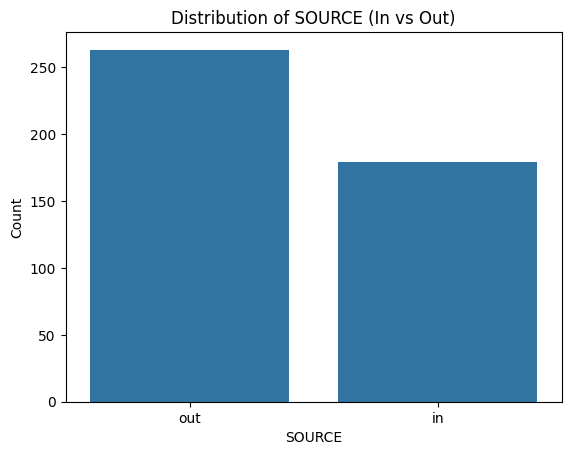

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
